In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse

mapping = {0: "Least Squares", 1: "Lasso", 2:"Ridge", 3:"Elastic Net"}

index = np.linspace(1, 24, 24)
X = np.zeros((24, 11))

for i in range(11):
    X[:, i] = np.power(index, i)

def corrupt(arr, num_corrupt):
    corr_arr = arr.copy()
    uwu = np.random.choice(24, num_corrupt)
    for x in uwu:
        corr_arr[x] = 0

    return corr_arr

def generate_models(y):
    least_squares = linear_model.LinearRegression().fit(X, y)
    lasso = linear_model.Lasso().fit(X, y)
    ridge = linear_model.Ridge().fit(X, y)
    elastic = linear_model.ElasticNet().fit(X, y)

    return pd.DataFrame(data=[least_squares, lasso, ridge, elastic]).T.rename(columns=mapping),\
           pd.DataFrame(data=[least_squares.coef_, lasso.coef_, ridge.coef_, elastic.coef_]).T.rename(columns=mapping)


def generate_predictions(y, linear_models):
    least_squares_pred = linear_models["Least Squares"][0].predict(X)
    lasso_pred = linear_models["Lasso"][0].predict(X)
    ridge_pred = linear_models["Ridge"][0].predict(X)
    elastic_pred = linear_models["Elastic Net"][0].predict(X)

    return pd.DataFrame(data=[least_squares_pred, lasso_pred, ridge_pred, elastic_pred]).T.rename(columns=mapping), \
           pd.DataFrame(data=[mse(y, least_squares_pred), mse(y, lasso_pred), mse(y, ridge_pred), mse(y, elastic_pred)]).T.rename(columns=mapping)


<h1>Temperature Data</h1>

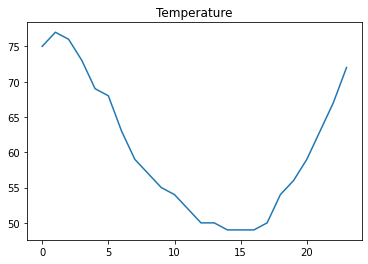

In [3]:
temp = np.array([75,77,76,73,69,68,63,59,57,55,54,52,50,50,49,49,49,50,54,56,59,63,67,72])

plt.plot(temp)
plt.title("Temperature")
plt.show()

In [4]:
models, coefficients = generate_models(temp)
predictions, errors = generate_predictions(temp, models)

C:\Users\chris\DataspellProjects\CRASA-NIJC\venv\uwu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.606e+01, tolerance: 2.145e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\chris\DataspellProjects\CRASA-NIJC\venv\uwu\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\chris\DataspellProjects\CRASA-NIJC\venv\uwu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.325e+01, tolerance: 2.145e-01
  model = cd_fast.enet_coo

In [5]:
predictions

,Least Squares,Lasso,Ridge,Elastic Net
0,74.980834,75.672763,75.729830,76.059864
1,77.190889,74.813551,76.136693,75.043279
2,75.578633,73.458753,75.492902,73.556431
3,73.034617,71.676952,73.464311,71.668479
4,70.015444,69.541680,70.293163,69.453032
5,66.588873,67.131536,66.550338,66.988210
6,63.017635,64.530220,62.845116,64.356604
7,59.700666,61.826434,59.614290,61.645120
8,56.953602,59.113603,57.033923,58.944634
9,54.865040,56.489334,55.044973,56.349423


In [6]:
coefficients

,Least Squares,Lasso,Ridge,Elastic Net
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,2.989706e+01,-0.000000e+00,3.241997e-01,-1.934075e-01
2,-1.894137e+01,-3.095035e-01,3.704667e-01,-2.980290e-01
3,6.309327e+00,9.504506e-03,-7.091638e-02,9.765975e-03
4,-1.297824e+00,1.803915e-04,-6.997972e-02,1.665940e-04
5,1.689235e-01,1.991129e-06,2.143311e-02,1.608444e-06
6,-1.406527e-02,-1.054194e-08,-2.667418e-03,-1.849481e-08
7,7.450447e-04,-1.762444e-09,1.782699e-04,-1.822955e-09
8,-2.424469e-05,-8.244823e-11,-6.718712e-06,-7.691089e-11
9,4.414467e-07,-3.033693e-12,1.348149e-07,-2.580946e-12


In [7]:
errors

,Least Squares,Lasso,Ridge,Elastic Net
0,0.278469,1.533217,0.361983,1.373144


<h1>Corrupted Temperature Data</h1>

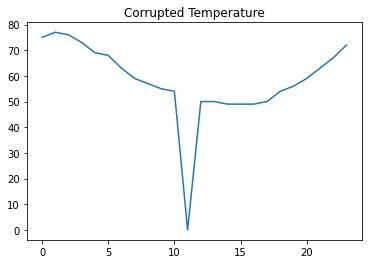

In [8]:
corr_temp = corrupt(temp, 1)

plt.plot(corr_temp)
plt.title("Corrupted Temperature")
plt.show()

In [9]:
corr_model, corr_coefficients = generate_models(corr_temp)
corr_predictions, corr_errors = generate_predictions(temp, corr_model)

C:\Users\chris\DataspellProjects\CRASA-NIJC\venv\uwu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.190e+03, tolerance: 5.594e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\chris\DataspellProjects\CRASA-NIJC\venv\uwu\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\chris\DataspellProjects\CRASA-NIJC\venv\uwu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.175e+03, tolerance: 5.594e-01
  model = cd_fast.enet_coo

In [10]:
corr_predictions

,Least Squares,Lasso,Ridge,Elastic Net
0,74.910755,78.001905,77.717155,78.200951
1,76.614595,76.389263,76.101630,76.624140
2,76.984770,74.125874,73.065833,74.351926
3,72.481845,71.328790,71.054812,71.513073
4,68.272869,68.122434,70.332176,68.243184
5,66.551314,64.637981,69.441375,64.683898
6,65.631798,61.012383,66.674237,60.981693
7,62.705776,57.386931,61.275558,57.286217
8,56.448276,53.905293,53.885689,53.748048
9,47.978374,50.710904,46.228236,50.515825


In [11]:
corr_coefficients

,Least Squares,Lasso,Ridge,Elastic Net
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,-1.046522e+02,-4.379828e-01,1.845697e+00,-3.129498e-01
2,9.370991e+01,-4.311571e-01,1.665666e+00,-4.656818e-01
3,-4.087690e+01,1.627807e-02,-3.017143e+00,1.834629e-02
4,9.922385e+00,3.226062e-04,1.260709e+00,3.174285e-04
5,-1.447325e+00,1.215343e-06,-2.512144e-01,3.911781e-07
6,1.314603e-01,-1.677202e-07,2.779260e-02,-1.959922e-07
7,-7.476433e-03,-8.188997e-09,-1.801765e-03,-8.797178e-09
8,2.585762e-04,-2.302000e-10,6.817973e-05,-2.326542e-10
9,-4.969548e-06,-2.725021e-12,-1.396025e-06,-2.067724e-12


In [12]:
corr_errors

,Least Squares,Lasso,Ridge,Elastic Net
0,35.164441,11.840667,30.858909,12.324209


As we can see, when we have an outlier data point, Lasso and Elastic Net significantly reduce the error due to added bias. Ridge also reduces the error, but not as much as Lasso and elastic net.

<h1>Variance</h1>

In [13]:
linear_coef = []
lasso_coef = []
ridge_coef = []
elastic_coef = []

for r in range(11):
    linear_coef.append([])
    lasso_coef.append([])
    ridge_coef.append([])
    elastic_coef.append([])

for attempt in range(10):
    corr_temp = corrupt(temp, 3)
    corr_coefficients = generate_models(corr_temp)[1]

    for r in range(11):
        linear_coef[r].append(corr_coefficients["Least Squares"][r])
        lasso_coef[r].append(corr_coefficients["Lasso"][r])
        ridge_coef[r].append(corr_coefficients["Ridge"][r])
        elastic_coef[r].append(corr_coefficients["Elastic Net"][r])

C:\Users\chris\DataspellProjects\CRASA-NIJC\venv\uwu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.439e+03, tolerance: 8.760e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\chris\DataspellProjects\CRASA-NIJC\venv\uwu\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\chris\DataspellProjects\CRASA-NIJC\venv\uwu\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.424e+03, tolerance: 8.760e-01
  model = cd_fast.enet_coo

The variance for the loadings of least squares regression:

In [14]:
for r in range(11):
    print("Variance for Coefficient #" + str(r) + ":\t\t" + str(np.var(linear_coef[r])))

Variance for Coefficient #0:		0.0
Variance for Coefficient #1:		126996.57961786394
Variance for Coefficient #2:		69049.73781488273
Variance for Coefficient #3:		10460.458735278657
Variance for Coefficient #4:		537.0523998303848
Variance for Coefficient #5:		10.347180506335496
Variance for Coefficient #6:		0.07911149396995533
Variance for Coefficient #7:		0.00024134404037975016
Variance for Coefficient #8:		2.7615207293520923e-07
Variance for Coefficient #9:		9.868193045062872e-11
Variance for Coefficient #10:		6.457714926914338e-15


The variance for the loadings of lasso regression:

In [15]:
for r in range(11):
    print("Variance for Coefficient #" + str(r) + ":\t\t" + str(np.var(lasso_coef[r])))

Variance for Coefficient #0:		0.0
Variance for Coefficient #1:		14.852918158155898
Variance for Coefficient #2:		0.13909376451979888
Variance for Coefficient #3:		0.0001045189798617835
Variance for Coefficient #4:		1.0708410367729217e-07
Variance for Coefficient #5:		9.700940235573284e-11
Variance for Coefficient #6:		1.1631881581315383e-13
Variance for Coefficient #7:		1.0482006355383006e-16
Variance for Coefficient #8:		7.906452215036313e-20
Variance for Coefficient #9:		2.3134949950447504e-22
Variance for Coefficient #10:		9.908880669271557e-25


The variance for the loadings of ridge regression:

In [16]:
for r in range(11):
    print("Variance for Coefficient #" + str(r) + ":\t\t" + str(np.var(ridge_coef[r])))

Variance for Coefficient #0:		0.0
Variance for Coefficient #1:		32.08726550348078
Variance for Coefficient #2:		34.60077911015706
Variance for Coefficient #3:		38.646765035622835
Variance for Coefficient #4:		5.023258540523044
Variance for Coefficient #5:		0.17786187488469005
Variance for Coefficient #6:		0.0021211297503600985
Variance for Coefficient #7:		9.098521040324117e-06
Variance for Coefficient #8:		1.3640333803678618e-08
Variance for Coefficient #9:		6.075942515968052e-12
Variance for Coefficient #10:		4.779776883355537e-16


The variance for the loadings of elastic net regression:

In [17]:
for r in range(11):
    print("Variance for Coefficient #" + str(r) + ":\t\t" + str(np.var(elastic_coef[r])))

Variance for Coefficient #0:		0.0
Variance for Coefficient #1:		4.475954541681577
Variance for Coefficient #2:		0.07104699758882314
Variance for Coefficient #3:		0.00014910901846361098
Variance for Coefficient #4:		8.466159121853056e-08
Variance for Coefficient #5:		9.840099617349756e-11
Variance for Coefficient #6:		1.2943271952282407e-13
Variance for Coefficient #7:		1.1138724927896585e-16
Variance for Coefficient #8:		7.16506646703581e-20
Variance for Coefficient #9:		2.173646483504018e-22
Variance for Coefficient #10:		9.972043377176768e-25


So as we can see, normal least squares has a huge amount of variance, but since the models with regularlization has the added bias to be more robust toward outliers, there is less variance.